In [1]:
import splat
import wisps
from astropy.io import fits, ascii
import matplotlib.pyplot as plt
import glob
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
data='/Users/caganze/research/wisps/data/manjavacas/final_data_journal/*.csv'

In [3]:
splat.initiateStandards()

In [4]:
spectra=[]
for f in glob.glob(data):
    try:
        d=ascii.read(f).to_pandas()

        s=wisps.Spectrum(wave=d.col1, flux=d.col2, noise=d.col3)
        s._filename=f.split('/')[-1].split('.csv')[0]
        spectra.append(s)
    except:
        pass

In [5]:
indices=pd.DataFrame([s.indices for s in spectra])
snrs=pd.DataFrame([s.snr for s in spectra])
ftests=pd.DataFrame.from_records([{'spex_chi': s.spex_chi, 'line_chi':s.line_chi, 'spt':s.spectral_type, 'f_test':s.f_test} for s in spectra])

In [6]:
df=pd.DataFrame()
for k in indices.columns: df[k]=indices[k]
for k in ftests.columns: df[k]=ftests[k]
for k in snrs.columns: df[k]=snrs[k]
df['name']=[s.filename for s in spectra]
df['spectra']=spectra

In [7]:
df.to_pickle(wisps.LIBRARIES+'/manjavacas.pkl')

No handles with labels found to put in legend.


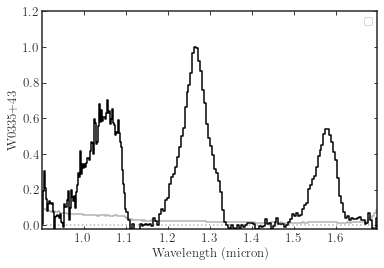

No handles with labels found to put in legend.


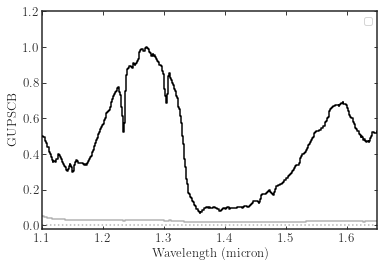

No handles with labels found to put in legend.


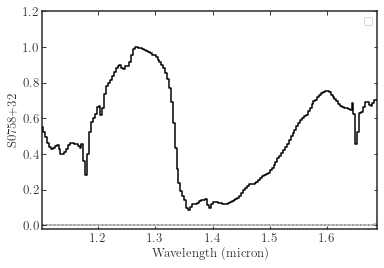

No handles with labels found to put in legend.


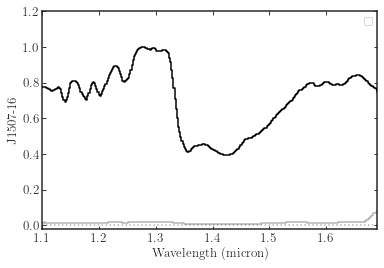

No handles with labels found to put in legend.


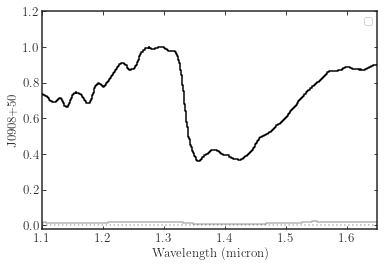

No handles with labels found to put in legend.


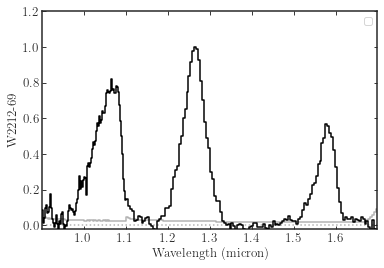

No handles with labels found to put in legend.


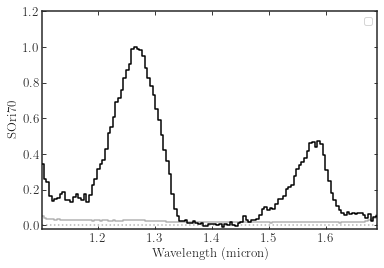

No handles with labels found to put in legend.


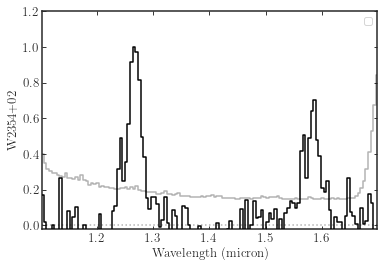

No handles with labels found to put in legend.


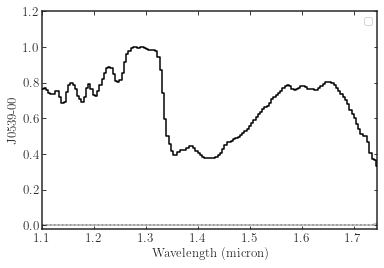

No handles with labels found to put in legend.


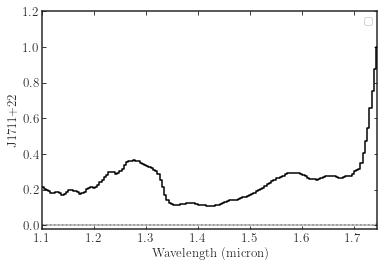

No handles with labels found to put in legend.


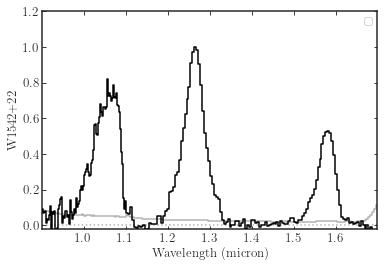

No handles with labels found to put in legend.


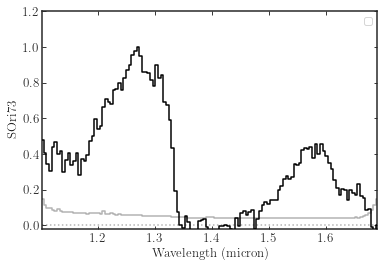

No handles with labels found to put in legend.


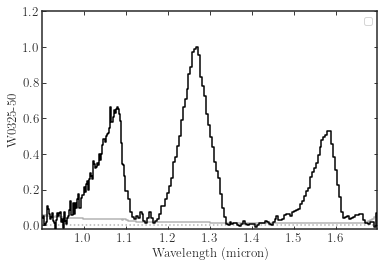

No handles with labels found to put in legend.


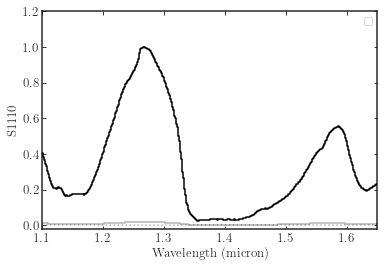

No handles with labels found to put in legend.


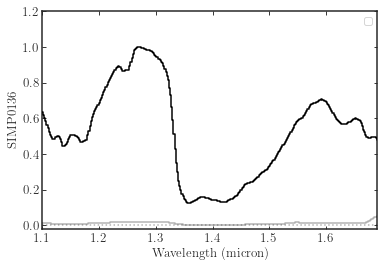

No handles with labels found to put in legend.


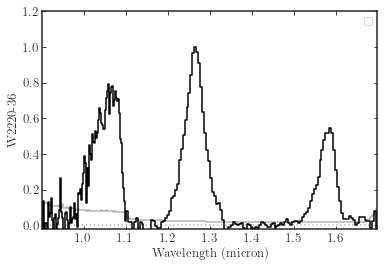

No handles with labels found to put in legend.


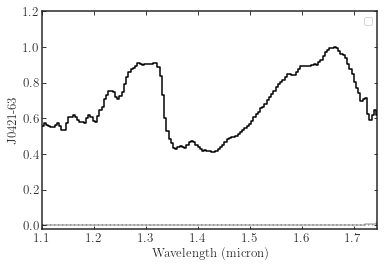

No handles with labels found to put in legend.


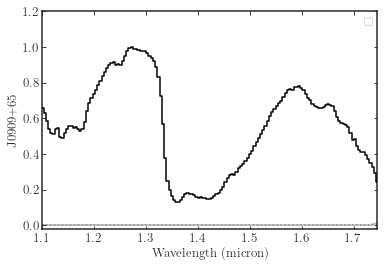

No handles with labels found to put in legend.


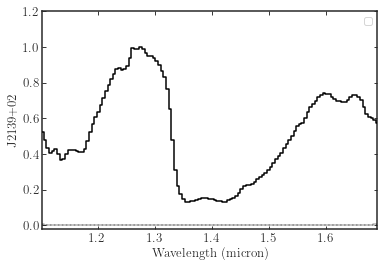

No handles with labels found to put in legend.


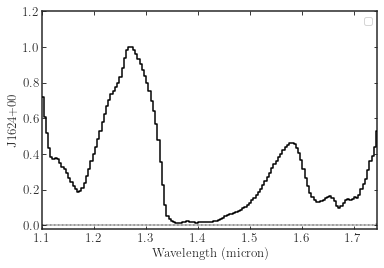

No handles with labels found to put in legend.


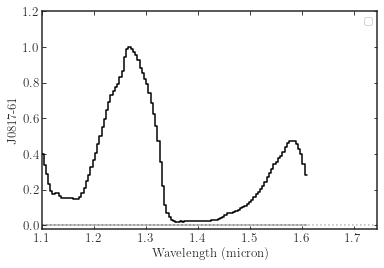

No handles with labels found to put in legend.


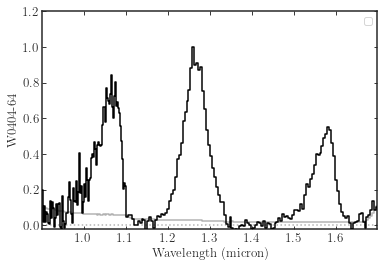

No handles with labels found to put in legend.


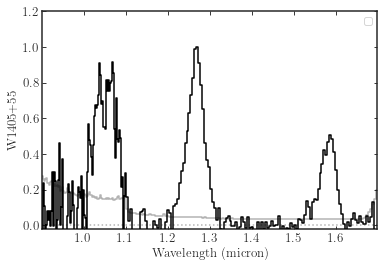

No handles with labels found to put in legend.


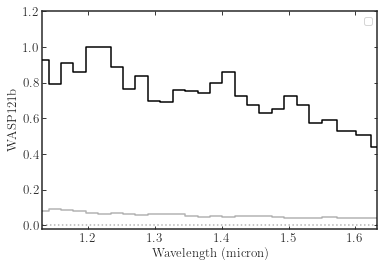

No handles with labels found to put in legend.


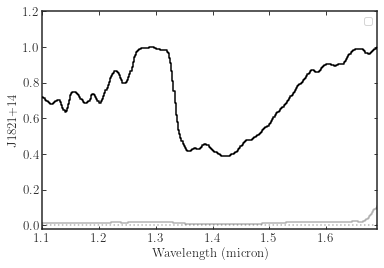

No handles with labels found to put in legend.


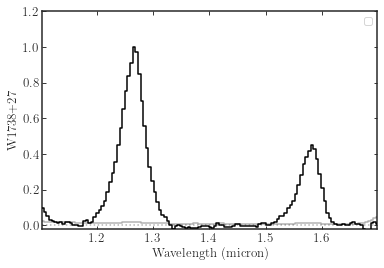

No handles with labels found to put in legend.


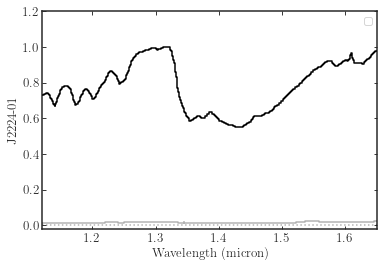

No handles with labels found to put in legend.


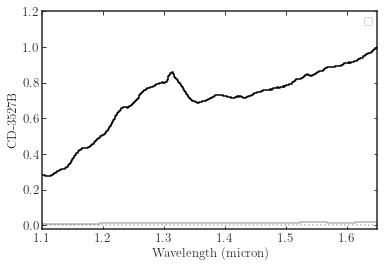

No handles with labels found to put in legend.


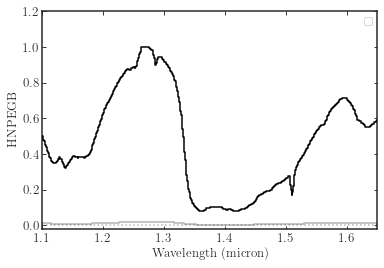

No handles with labels found to put in legend.


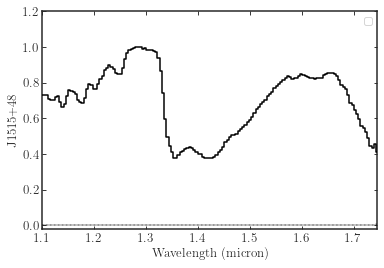

No handles with labels found to put in legend.


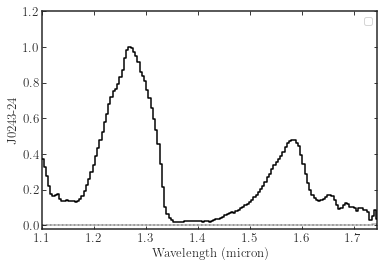

No handles with labels found to put in legend.


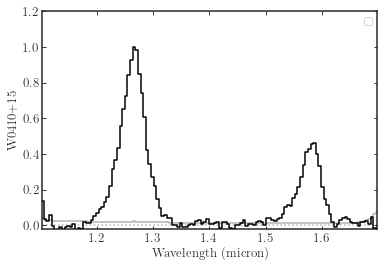

No handles with labels found to put in legend.


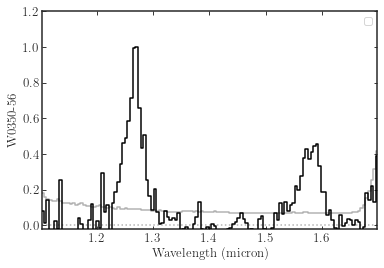

No handles with labels found to put in legend.


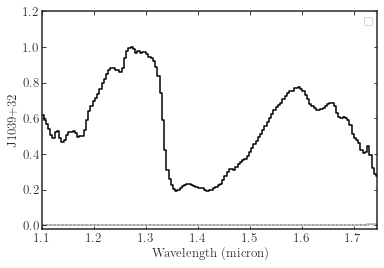

No handles with labels found to put in legend.


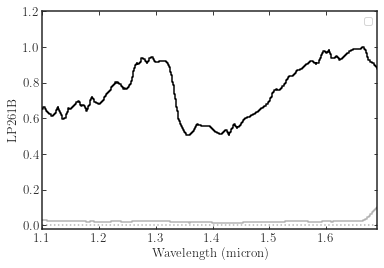

No handles with labels found to put in legend.


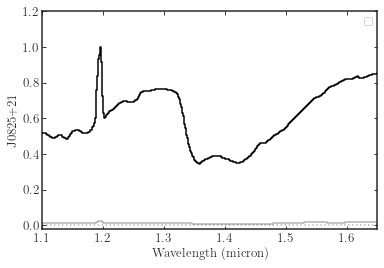

No handles with labels found to put in legend.


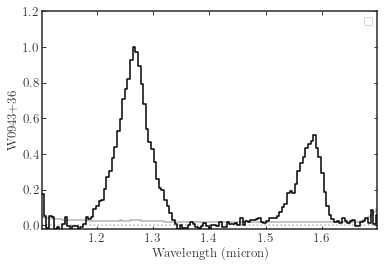

No handles with labels found to put in legend.


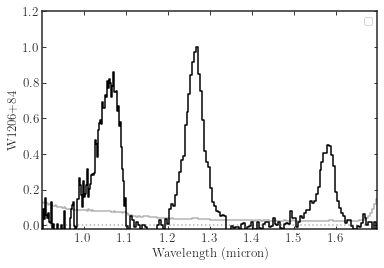

No handles with labels found to put in legend.


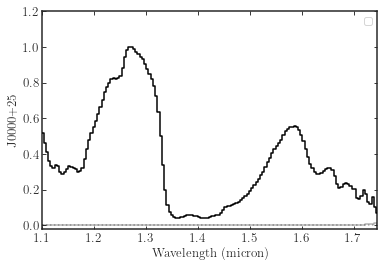

No handles with labels found to put in legend.


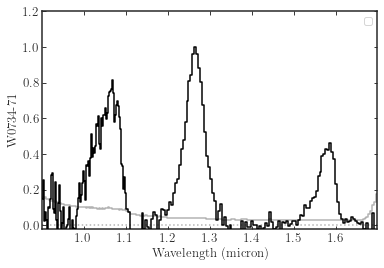

No handles with labels found to put in legend.


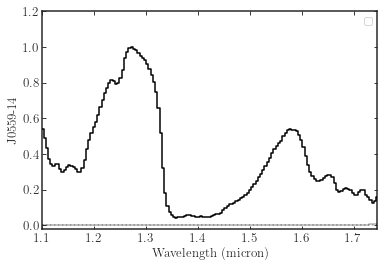

No handles with labels found to put in legend.


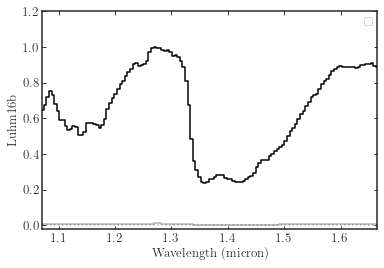

No handles with labels found to put in legend.


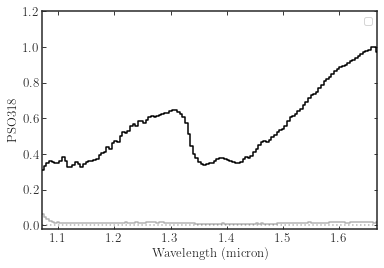

No handles with labels found to put in legend.


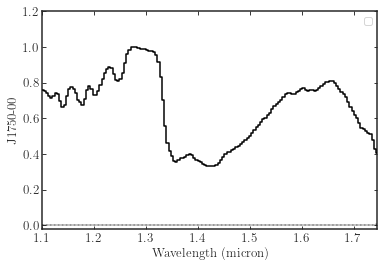

No handles with labels found to put in legend.


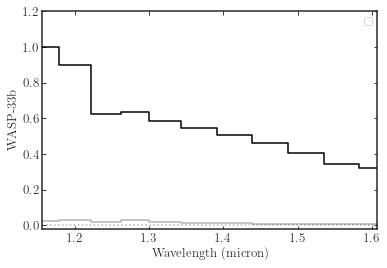

No handles with labels found to put in legend.


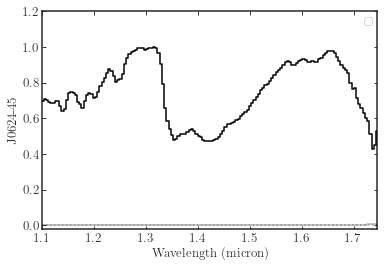

No handles with labels found to put in legend.


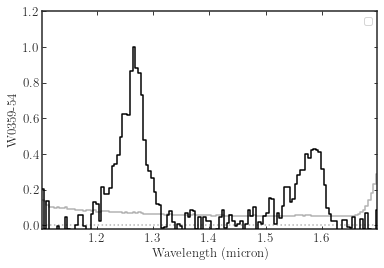

No handles with labels found to put in legend.


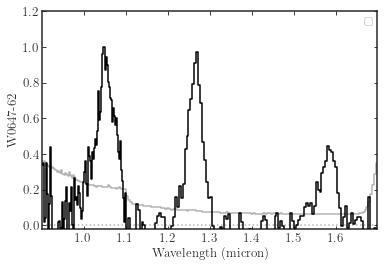

No handles with labels found to put in legend.


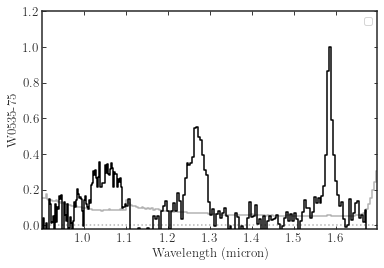

No handles with labels found to put in legend.


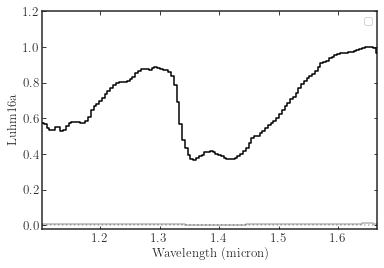

No handles with labels found to put in legend.


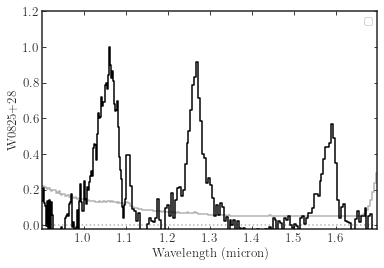

No handles with labels found to put in legend.


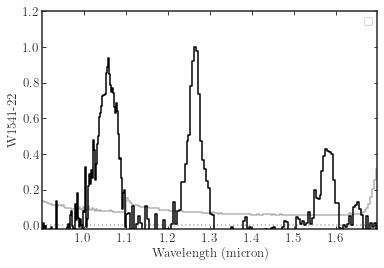

No handles with labels found to put in legend.


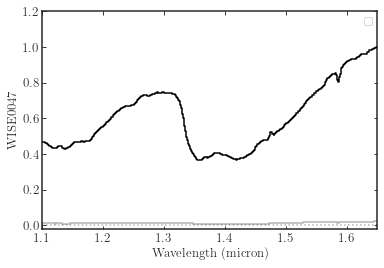

No handles with labels found to put in legend.


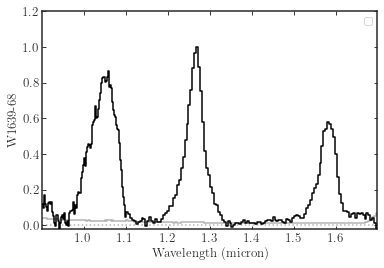

No handles with labels found to put in legend.


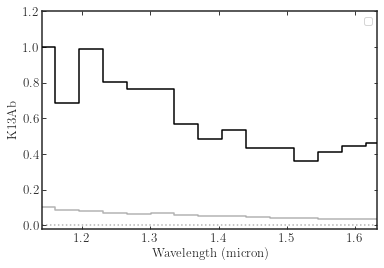

No handles with labels found to put in legend.


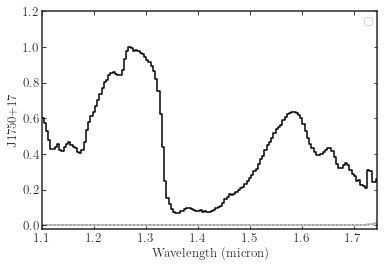

No handles with labels found to put in legend.


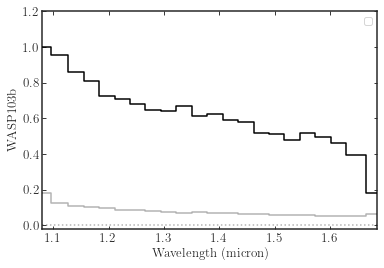

No handles with labels found to put in legend.


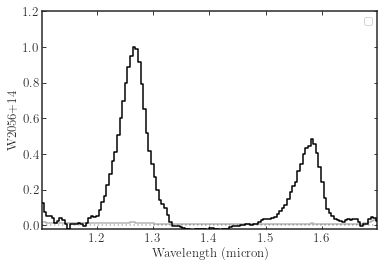

No handles with labels found to put in legend.


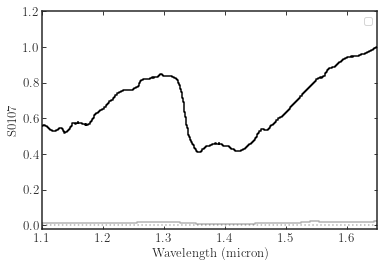

No handles with labels found to put in legend.


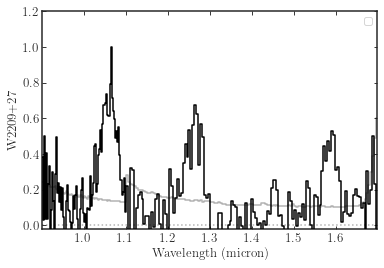

No handles with labels found to put in legend.


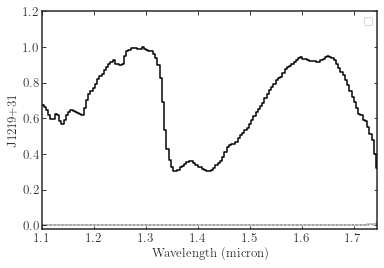

No handles with labels found to put in legend.


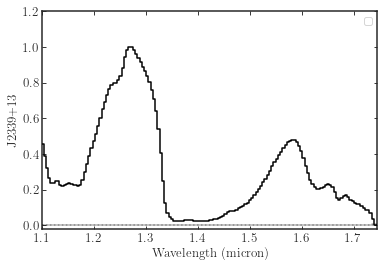

No handles with labels found to put in legend.


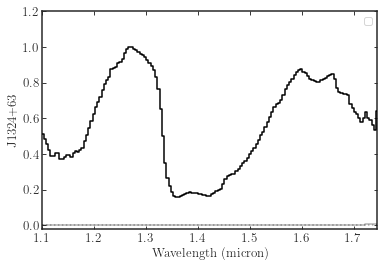

No handles with labels found to put in legend.


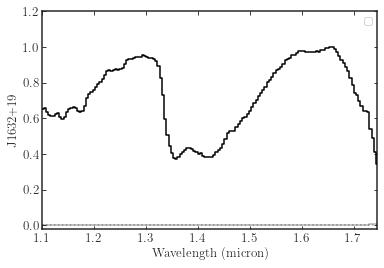

No handles with labels found to put in legend.


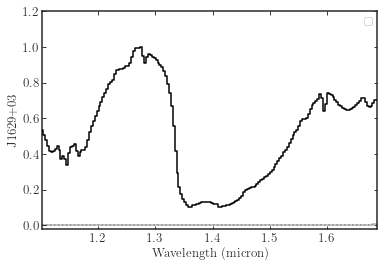

No handles with labels found to put in legend.


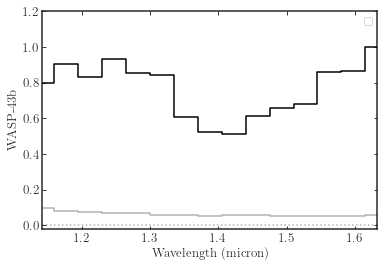

No handles with labels found to put in legend.


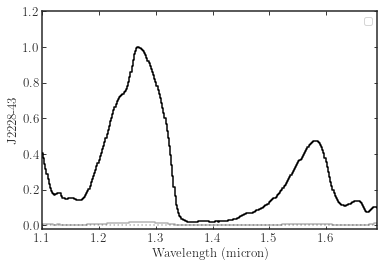

No handles with labels found to put in legend.


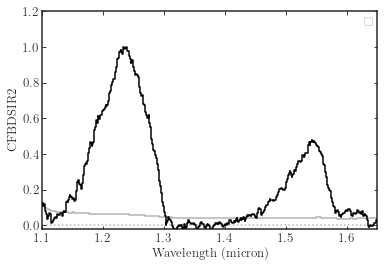

No handles with labels found to put in legend.


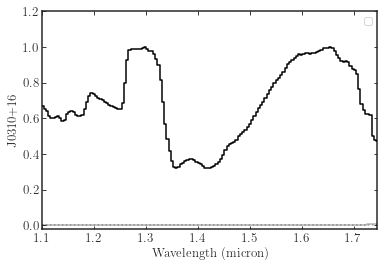

No handles with labels found to put in legend.


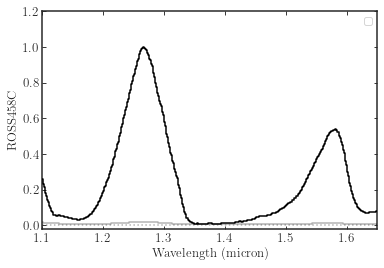

No handles with labels found to put in legend.


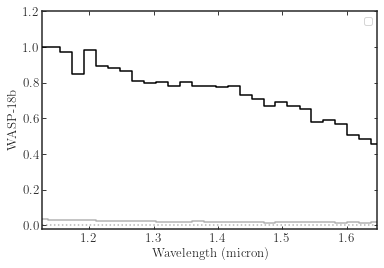

No handles with labels found to put in legend.


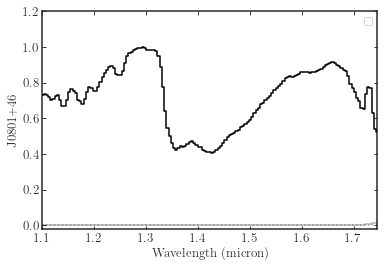

No handles with labels found to put in legend.


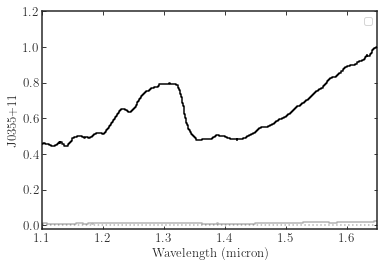

In [8]:
for s in spectra:
    s.splat_spectrum.plot(ylabel=s.filename)

In [9]:
#ghjkla
#spex=wisps.spex_sample_ids(stype='spex_sample',  from_file=False)
#spexids=pd.DataFrame([x for x in spex['Indices']])
#for k in spexids.columns: spex[k]=spexids[k]
#ref=wisps.Annotator.reformat_table(spexids)
df['spectra']=spectra
df=wisps.Annotator.reformat_table(df)

No handles with labels found to put in legend.


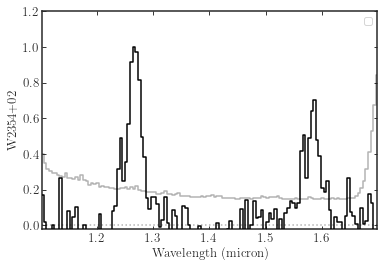

No handles with labels found to put in legend.


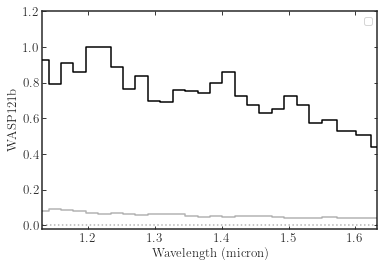

No handles with labels found to put in legend.


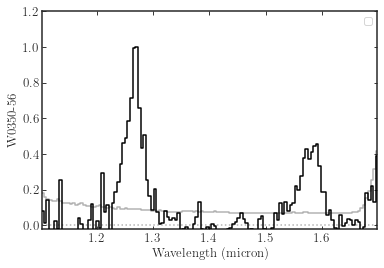

No handles with labels found to put in legend.


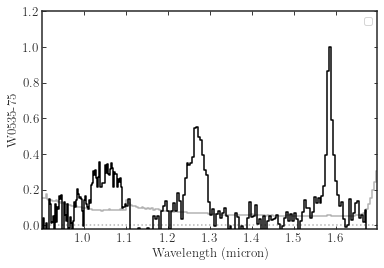

No handles with labels found to put in legend.


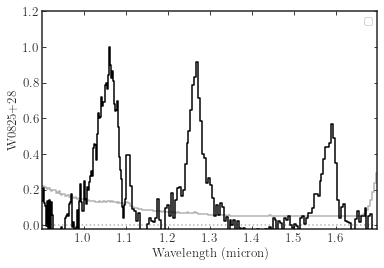

No handles with labels found to put in legend.


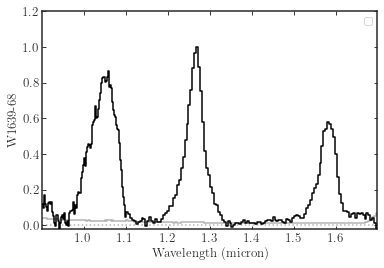

No handles with labels found to put in legend.


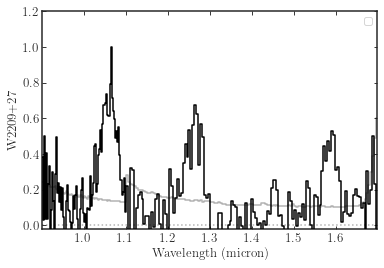

No handles with labels found to put in legend.


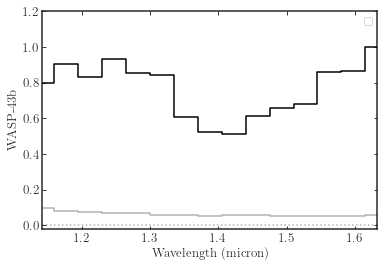

In [10]:
f=df[(df['CH_4/H-Cont'] <0.5) & (df['H-cont/J-Cont'] >0.6)].spectra.apply(lambda x: x.splat_spectrum.plot(ylabel=x.filename))

In [15]:
np.vstack(df.spt.values)[:,0]

array([38., 33., 32., 25., 26., 39., 37., 40., 25., 30., 39., 35., 38.,
       35., 32., 40., 27., 32., 32., 36., 36., 39., 40., 14., 25., 40.,
       27., 27., 34., 25., 36., 40., 41., 31., 27., 28., 39., 40., 34.,
       40., 34., 31., 27., 26., 16., 27., 39., 40., 39., 28., 40., 40.,
       28., 39., 17., 34., 13., 40., 28., 38., 29., 35., 32., 29., 32.,
       23., 36., 36., 29., 38., 13., 25., 27.])

In [16]:
ydwarfs=df[np.vstack(df.spt.values)[:,0]>37]
#df[(df['CH_4/H-Cont'] <0.5) & (df['H-cont/J-Cont'] >0.6)]

In [17]:
schn='/Users/caganze/research/wisps/data/schneider/*.txt'

In [18]:
schntb=pd.read_csv('/Users/caganze/research/wisps/data/schneider2015.txt', delimiter=' ').drop(columns='Unnamed: 14')

In [19]:
def get_shortname(n):
    return splat.designationToShortName(n).replace('J', 'WISE')

In [20]:
schntb['shortname']=schntb.Name.apply(get_shortname)

In [21]:
schntb

,Name,Spec,Y_MKO,Y_MKO_er,J_MKO,J_MKO_er,H_MKO,H_MKO_er,F105W,F105W_er,F125W,F125W_er,F140W,F140W_eR,shortname
0,J032504.52-504403.0,T8,19.980,0.027,18.935,0.024,19.423,0.027,20.601,0.028,19.547,0.023,19.223,0.022,WISE0325-5044
1,J033515.07+431044.7,T9,20.166,0.029,19.467,0.023,19.938,0.031,20.939,0.033,20.137,0.025,19.785,0.023,WISE0335+4310
2,J035000.31-565830.5,Y1,NaN,NaN,22.178,0.073,22.263,0.135,NaN,NaN,22.951,0.114,22.431,0.073,WISE0350-5658
3,J035934.07-540154.8,Y0,NaN,NaN,21.566,0.046,22.028,0.112,NaN,NaN,22.258,0.062,21.789,0.045,WISE0359-5401
4,J040443.50-642030.0,T9,20.328,0.032,19.647,0.025,19.970,0.033,21.063,0.037,20.293,0.028,19.893,0.024,WISE0404-6420
5,J041022.75+150247.9,Y0,NaN,NaN,19.325,0.024,19.897,0.038,NaN,NaN,19.997,0.025,19.643,0.024,WISE0410+1502
6,J053516.87-750024.6,Y1,22.701,0.070,22.132,0.071,NaN,NaN,23.581,0.138,22.876,0.102,NaN,NaN,WISE0535-7500
7,J064723.24-623235.4,Y1,22.870,0.076,22.854,0.066,23.306,0.166,23.833,0.117,23.683,0.098,23.204,0.066,WISE0647-6232
8,J073444.03-715743.8,Y0,20.870,0.041,20.354,0.029,21.069,0.071,21.675,0.051,21.045,0.035,20.726,0.030,WISE0734-7157
9,J082507.37+280548.2,Y0.5,22.566,0.053,22.401,0.050,22.965,0.139,23.409,0.073,23.015,0.062,22.731,0.051,WISE0825+2805


In [22]:
spectra_schn=[]
shortnams=[]
for f in glob.glob(schn):
    d=ascii.read(f).to_pandas()
    shortname=(f.split('/')[-1]).split('.txt')[0]
    s=wisps.Spectrum(wave=d.col1, flux=d.col2, noise=d.col3)
    s._filename=shortname
    spectra_schn.append(s)
    shortnams.append((f.split('/')[-1]).split('.txt')[0])

In [23]:
indices=pd.DataFrame([s.indices for s in spectra_schn])
snrs=pd.DataFrame([s.snr for s in spectra_schn])
fs=pd.DataFrame.from_records([{'spex_chi': s.spex_chi,
                               'line_chi':s.line_chi, 'spt':s.spectral_type, 'f_test':s.f_test} for s in spectra_schn])

In [24]:
df=pd.DataFrame()
df['name']=[s.filename.replace('.txt', '') for s in spectra_schn ]
df['shortname']=shortnams

In [25]:
new_df=df.join(indices).join(snrs).join(fs)

In [26]:
nf_df=new_df.merge(schntb)

In [27]:
nf_df['spectra']=spectra_schn

In [28]:
nf_df.to_pickle(wisps.LIBRARIES+'/schneider.pkl')

In [29]:
dfnnn=wisps.Annotator.reformat_table(nf_df[wisps.INDEX_NAMES])

In [31]:
import wisps

In [ ]:
s=wisps.Source()